### General Imports

In [1]:
import pandas as pd  # data processing
import numpy as np # Linear Algebrea
import matplotlib.pyplot as plt # Plotting
import seaborn as sns

### Loading the Dataset into Pandas DataFrame

In [2]:
data = pd.read_csv("iris.csv")
data.head()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Get Features into a NumPy Array

In [4]:
features = ['PetalLength[cm]', 'PetalWidth[cm]']
X = data[features].values   # Getting the values in a NumPy Array

In [5]:
print(X.shape)

(150, 2)


In [6]:
X[:5, :]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

### Getting Class Labels into NumPy  Array

In [7]:
label_dict = {'Iris-setosa' : 0,
              'Iris-versicolor' : 1,
              'Iris-virginica' : 2}
data['ClassLabel'] = data['Species'].map(label_dict)

y  = data['ClassLabel'].values

This transformed Iris-setosa, Iris-versicolor, and Iris-virginica into the values 0, 1, and 2, respectively.

Typically, features are represented by $X$, while target labels are denoted by $y$

### Shuffle Dataset and Create Training and Test Subsets

In [8]:
y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [9]:
y[100:150]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [10]:
indices = np.arange(y.shape[0])
indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

We will shuffle the data to avoid a situation where the first 100 examples belong to classes 0 and 1. If we use a test split that only includes class 2, the model will not perform well

In [11]:
rnd = np.random.RandomState(42) # Can also use np.random.seed() if the results should be same all the time
shuffled_indices = rnd.permutation(indices)
shuffled_indices

array([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,
         9,  19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145,
       108, 143,  45,  30,  22,  15,  65,  11,  42, 146,  51,  27,   4,
        32, 142,  85,  86,  16,  10,  81, 133, 137,  75, 109,  96, 105,
        66,   0, 122,  67,  28,  40,  44,  60, 123,  24,  25,  23,  94,
        39,  95, 117,  47,  97, 113,  33, 138, 101,  62,  84, 148,  53,
         5,  93, 111,  49,  35,  80,  77,  34, 114,   7,  43,  70,  98,
       120,  83, 134, 135,  89,   8,  13, 119, 125,   3,  17,  38,  72,
       136,   6, 112, 100,   2,  63,  54, 126,  50, 115,  46, 139,  61,
       147,  79,  59,  91,  41,  58,  90,  48,  88, 107, 124,  21,  57,
       144, 129,  37, 140,   1,  52, 130, 103,  99, 116,  87,  74, 121,
       149,  20,  71, 106,  14,  92, 102])

In [12]:
X_shuffled, y_shuffled = X[shuffled_indices], y[shuffled_indices]

In [13]:
# Spliting the data into train and test subsets

X_train, y_train = X_shuffled[:105], y_shuffled[:105]
X_test, y_test = X_shuffled[105:], y_shuffled[105:]

### Plot Dataset

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               150 non-null    int64  
 1   SepalLength[cm]  150 non-null    float64
 2   SepalWidth[cm]   150 non-null    float64
 3   PetalLength[cm]  150 non-null    float64
 4   PetalWidth[cm]   150 non-null    float64
 5   Species          150 non-null    object 
 6   ClassLabel       150 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


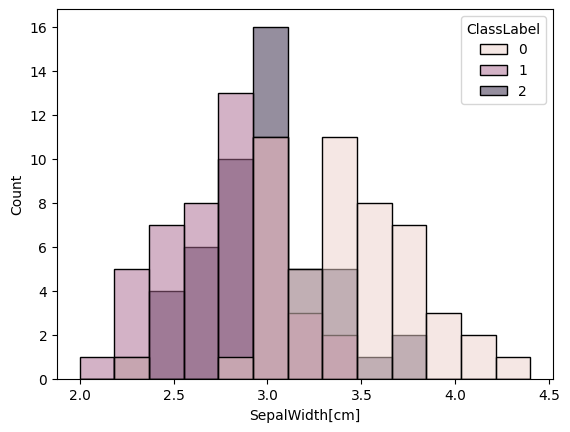

In [15]:
sns.histplot(data = data, x = 'SepalWidth[cm]', hue='ClassLabel')
plt.show()

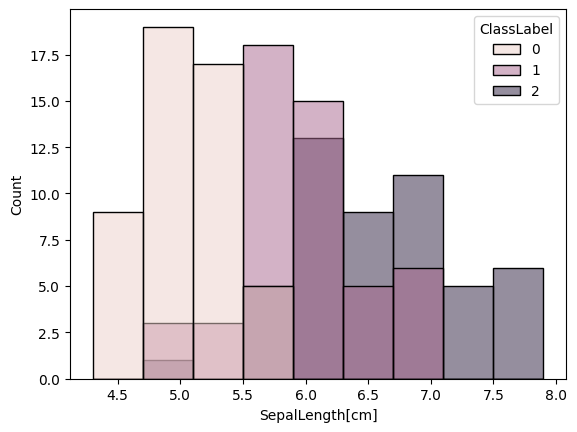

In [16]:
sns.histplot(data = data, x = 'SepalLength[cm]', hue='ClassLabel')
plt.show()

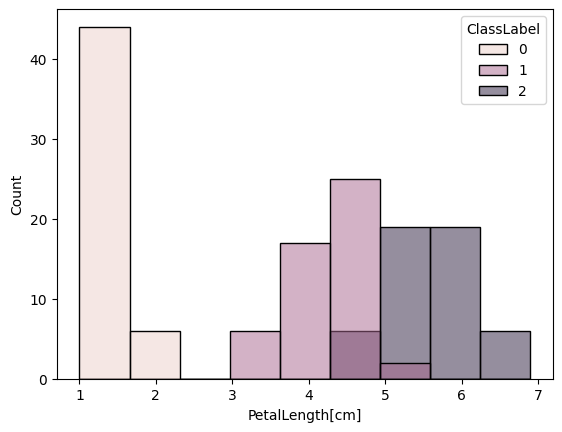

In [17]:
sns.histplot(data = data, x = 'PetalLength[cm]', hue='ClassLabel')
plt.show()

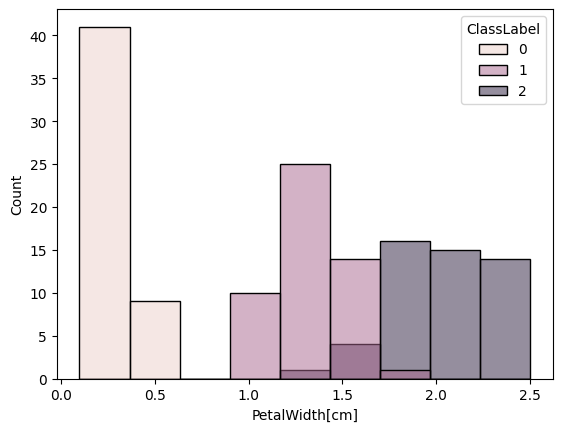

In [18]:
sns.histplot(data = data, x = 'PetalWidth[cm]', hue='ClassLabel')
plt.show()

After plotting the histograms, it becomes evident that sepal length and sepal width are not particularly useful for classification, as they do not provide clear differentiation compared to petal length and petal width.

### Fit k-Nearest Neighbor Model

In [19]:
KNeighborsClassifier?

Object `KNeighborsClassifier` not found.


In SciKit Learn, the model utilizes the Minkowski distance measure, with the default value of $p$ set to 2. This indicates that the distance measure used is the Euclidean distance.

In [20]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors =3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred = knn_model.predict(X_test)

In [22]:
correct_predictions = np.sum(y_pred == y_test)
accuracy = (correct_predictions/y_test.shape[0])*100

print('Test set accuracy :', round(accuracy, 2))

Test set accuracy : 97.78


The accuracy can also be determined using the `score` function.

In [23]:
knn_model.score(X_test, y_test)

0.9777777777777777

In [24]:
knn_model.score(X_train, y_train)

0.9904761904761905

Observing the training set accuracy, we notice that it is somewhat higher, indicating that the model may be experiencing slight overfitting.

### Visualizing Decision Boundaries

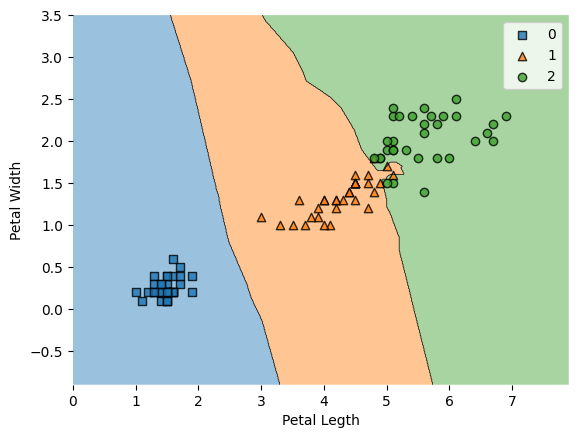

In [25]:
from mlxtend.plotting import plot_decision_regions


plot_decision_regions(X_train, y_train, knn_model)
plt.xlabel('Petal Legth')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

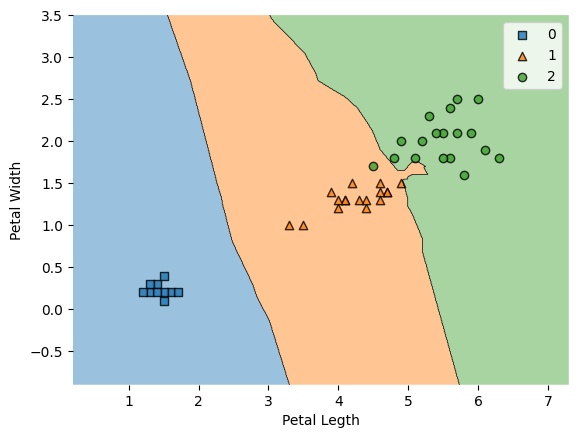

In [26]:
plot_decision_regions(X_test, y_test, knn_model)
plt.xlabel('Petal Legth')
plt.ylabel('Petal Width')
plt.legend()
plt.show()